In [1]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Instructions for updating:
non-resource variables are not supported in the long term
Num GPUs Available:  2


In [3]:
from tensorflow.python.client import device_lib

In [4]:
#print(device_lib.list_local_devices())


In [5]:
#sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True))

In [6]:
!pip install --upgrade pip
!pip install pandas as pd
!pip install numpy as np
!pip install keras

import tensorflow.compat.v1  as tf
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import keras



In [7]:
!pip install imblearn
!pip install seaborn

In [8]:
#gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)]
NUM_THREADS=6

config = tf.ConfigProto(device_count = {'GPU': 65 , 'CPU': 40} ) #intra_op_parallelism_threads=NUM_THREADS)# 
sess = tf.Session(config=config) 
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 
tf.compat.v1.keras.backend.set_session(sess)

In [9]:
!rm -rf ./logs/

In [10]:
data_train=pd.read_csv('/tf/tensorflow-tutorials/Modelo_1/CICLOS_v3/RGB/1/Parâmetros_de_todos_para_validacao_1_ciclos_RGB.csv') #('/tf/tensorflow-tutorials/Modelo_1/Parâmetros_de_todos.csv')

In [11]:
data_train

,Altura (m),Idade,Sexo,Velocidade média (m/s),Cadência,Comprimento médio passada,Erro absoluto médio do comprimento de passo em metros,Desvio padrão comprimento passo medido em metros,Desvio padrão do erro de comprimento de passo em metros,Largura da passada,...,Desvio padrão do ângulo médio da coxa do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo,Desvio padrão do ângulo de flexão do joelho esquerdo,Ângulo médio de flexão do joelho direito,Desvio padrão do ângulo de flexão do joelho direito,Ângulo extensão do quadril (°),Desvio padrão do ângulo de extensão do quadril (°),Simetria do comprimento de passo,Desvio padrão da simetria do comprimento de passo,Movimento
0,1.765,20.0,0,1.1864,28.5100,0.5000,0.5000,0.5000,0.39,0.2422,...,63.845885,36.090484,33.285714,35.658659,30.631330,-26.754673,29.322358,0.239487,0.239487,0
1,1.765,20.0,0,1.6142,55.0938,0.8432,0.3777,0.3777,0.29,0.1983,...,63.733507,34.090070,30.468070,26.451588,28.364084,-21.745160,25.121271,0.463693,0.372522,0
2,1.765,20.0,0,1.6873,67.0830,0.9238,0.3092,0.3092,0.23,0.1792,...,63.037000,31.065103,27.007995,25.991123,25.483771,-19.423324,22.576862,0.607896,0.407998,0
3,1.765,20.0,0,1.5355,54.7841,0.9750,0.1925,0.1925,0.15,0.1569,...,59.384128,26.123047,23.938033,25.633571,23.984491,-7.262991,23.463327,0.712707,0.420846,0
4,1.765,20.0,0,1.5863,60.3409,0.9905,0.1856,0.1856,0.14,0.1501,...,59.109586,25.290833,23.203301,23.922536,22.997950,-5.439119,22.799378,0.756397,0.396405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1.765,20.0,0,1.0497,29.6283,0.8982,0.2538,0.2538,0.21,0.1864,...,61.303668,11.048160,11.727418,11.862961,8.056126,-2.920268,13.871626,0.753295,0.453537,5
999,1.765,20.0,0,1.1192,33.9087,0.9226,0.2104,0.2104,0.18,0.1775,...,60.172454,11.318548,11.916923,11.864279,8.164148,-1.850629,13.894048,0.780018,0.418310,5
1000,1.765,20.0,0,1.1940,36.4808,0.9294,0.2023,0.2023,0.17,0.1711,...,59.388585,11.964523,12.373629,11.362223,8.009364,-0.523739,13.986811,0.790686,0.388161,5
1001,1.765,20.0,0,1.2668,29.5747,0.9643,0.1251,0.1251,0.10,0.1505,...,57.697810,11.998292,12.103608,10.747879,7.863966,-2.646515,13.061075,0.802964,0.364542,5


In [12]:
data_test=pd.read_csv('/tf/tensorflow-tutorials/Modelo_1/CICLOS_NA_NORMALIZACAO_2/RGB/4/Parâmetros_de_todos_para_validacao_20201026_4_ciclos_RGB.csv') #('/tf/tensorflow-tutorials/Modelo_1/Parâmetros_de_todos.csv')

In [13]:
data_test

,Altura (m),Idade,Sexo,Velocidade média (m/s),Cadência,Comprimento médio passada,Erro absoluto médio do comprimento de passo em metros,Desvio padrão comprimento passo medido em metros,Desvio padrão do erro de comprimento de passo em metros,Largura da passada,...,Desvio padrão do ângulo médio da coxa do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo,Desvio padrão do ângulo de flexão do joelho esquerdo,Ângulo médio de flexão do joelho direito,Desvio padrão do ângulo de flexão do joelho direito,Ângulo extensão do quadril (°),Desvio padrão do ângulo de extensão do quadril (°),Simetria do comprimento de passo,Desvio padrão da simetria do comprimento de passo,Movimento
0,1.765,20.0,0,4.7114,0.0000,0.0000,0.000,0.000,0.00,0.6593,...,0.000000,46.125476,45.125476,41.449890,40.449890,0.000000,0.000000,0.000000,0.000000,0
1,1.765,20.0,0,2.6784,156.6740,0.0000,0.000,0.000,0.00,0.5438,...,40.494494,49.434189,37.140736,44.055560,33.232135,-48.213917,48.213917,0.000000,0.000000,0
2,1.765,20.0,0,1.9959,115.0889,0.0000,0.000,0.000,0.00,0.4848,...,37.533868,49.959544,32.177689,41.880423,29.025416,-52.830101,39.904129,0.000000,0.000000,0
3,1.765,20.0,0,1.6321,92.3506,0.0000,0.000,0.000,0.00,0.4484,...,33.788442,43.965565,31.177461,44.298684,26.407797,-49.560904,35.018818,0.000000,0.000000,0
4,1.765,20.0,0,1.4922,76.8347,0.0000,0.000,0.000,0.00,0.3960,...,30.914964,36.842840,32.614329,40.200068,25.790238,-51.070091,31.466882,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,1.765,20.0,0,1.6407,35.0435,0.9602,0.097,0.097,0.08,0.1471,...,58.827607,11.741206,11.709110,11.138884,9.013744,-0.185727,12.815989,0.847389,0.365942,5
4151,1.765,20.0,0,1.6349,34.8739,0.9602,0.097,0.097,0.08,0.1476,...,58.974940,11.721134,11.689280,11.106350,9.009539,-0.194004,12.790240,0.847389,0.365942,5
4152,1.765,20.0,0,1.6272,34.6642,0.9602,0.097,0.097,0.08,0.1482,...,58.945914,11.787720,11.711676,11.085569,8.996991,-0.177758,12.766515,0.847389,0.365942,5
4153,1.765,20.0,0,1.6218,34.5036,0.9602,0.097,0.097,0.08,0.1487,...,59.105138,11.775342,11.689453,11.071217,8.981496,-0.185107,12.740952,0.847389,0.365942,5


In [14]:
import seaborn as sns

In [15]:
data_train.corr()

,Altura (m),Idade,Sexo,Velocidade média (m/s),Cadência,Comprimento médio passada,Erro absoluto médio do comprimento de passo em metros,Desvio padrão comprimento passo medido em metros,Desvio padrão do erro de comprimento de passo em metros,Largura da passada,...,Desvio padrão do ângulo médio da coxa do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo,Desvio padrão do ângulo de flexão do joelho esquerdo,Ângulo médio de flexão do joelho direito,Desvio padrão do ângulo de flexão do joelho direito,Ângulo extensão do quadril (°),Desvio padrão do ângulo de extensão do quadril (°),Simetria do comprimento de passo,Desvio padrão da simetria do comprimento de passo,Movimento
Altura (m),1.000000,-0.316460,-0.451227,-0.016831,-0.058156,0.042612,0.023224,0.023224,0.021684,0.202061,...,-0.101588,-0.012349,-0.119807,-0.086296,-0.129859,-0.019875,-0.021543,0.051845,0.044486,-0.041221
Idade,-0.316460,1.000000,-0.177168,0.225684,0.157824,0.053507,0.038523,0.038523,0.105574,0.122121,...,0.152154,0.119073,0.054541,0.091135,0.076537,-0.126389,0.076890,-0.020270,-0.056425,0.090504
Sexo,-0.451227,-0.177168,1.000000,-0.023746,-0.015037,0.018201,0.009043,0.009043,0.011378,-0.105416,...,0.027514,0.059837,0.125343,0.045394,0.052088,-0.057552,-0.077623,-0.034625,-0.040624,-0.008257
Velocidade média (m/s),-0.016831,0.225684,-0.023746,1.000000,0.296156,0.156308,0.111112,0.111112,0.092934,-0.051123,...,0.222694,0.120098,0.133810,0.152651,0.233842,-0.174728,-0.020225,0.013923,0.112787,0.075615
Cadência,-0.058156,0.157824,-0.015037,0.296156,1.000000,0.089628,-0.169690,-0.169690,-0.151178,0.204295,...,-0.184889,0.066980,0.140981,-0.001312,0.076290,-0.029294,-0.146954,0.242007,0.030598,-0.354761
Comprimento médio passada,0.042612,0.053507,0.018201,0.156308,0.089628,1.000000,-0.587364,-0.587364,-0.482080,-0.551544,...,0.383885,0.162476,0.237951,0.116863,0.201960,0.318911,0.201446,0.811519,0.210890,0.152346
Erro absoluto médio do comprimento de passo em metros,0.023224,0.038523,0.009043,0.111112,-0.169690,-0.587364,1.000000,1.000000,0.919165,0.351308,...,-0.171273,-0.001813,-0.106900,0.018957,-0.114142,-0.456550,-0.008381,-0.709272,0.209972,-0.134112
Desvio padrão comprimento passo medido em metros,0.023224,0.038523,0.009043,0.111112,-0.169690,-0.587364,1.000000,1.000000,0.919165,0.351308,...,-0.171273,-0.001813,-0.106900,0.018957,-0.114142,-0.456550,-0.008381,-0.709272,0.209972,-0.134112
Desvio padrão do erro de comprimento de passo em metros,0.021684,0.105574,0.011378,0.092934,-0.151178,-0.482080,0.919165,0.919165,1.000000,0.311222,...,-0.130117,0.029103,-0.087464,0.059144,-0.087892,-0.506577,-0.009583,-0.586980,0.186132,-0.088617
Largura da passada,0.202061,0.122121,-0.105416,-0.051123,0.204295,-0.551544,0.351308,0.351308,0.311222,1.000000,...,-0.522650,-0.074758,-0.220398,-0.171749,-0.308483,-0.213030,-0.182989,-0.489546,-0.140570,-0.082923


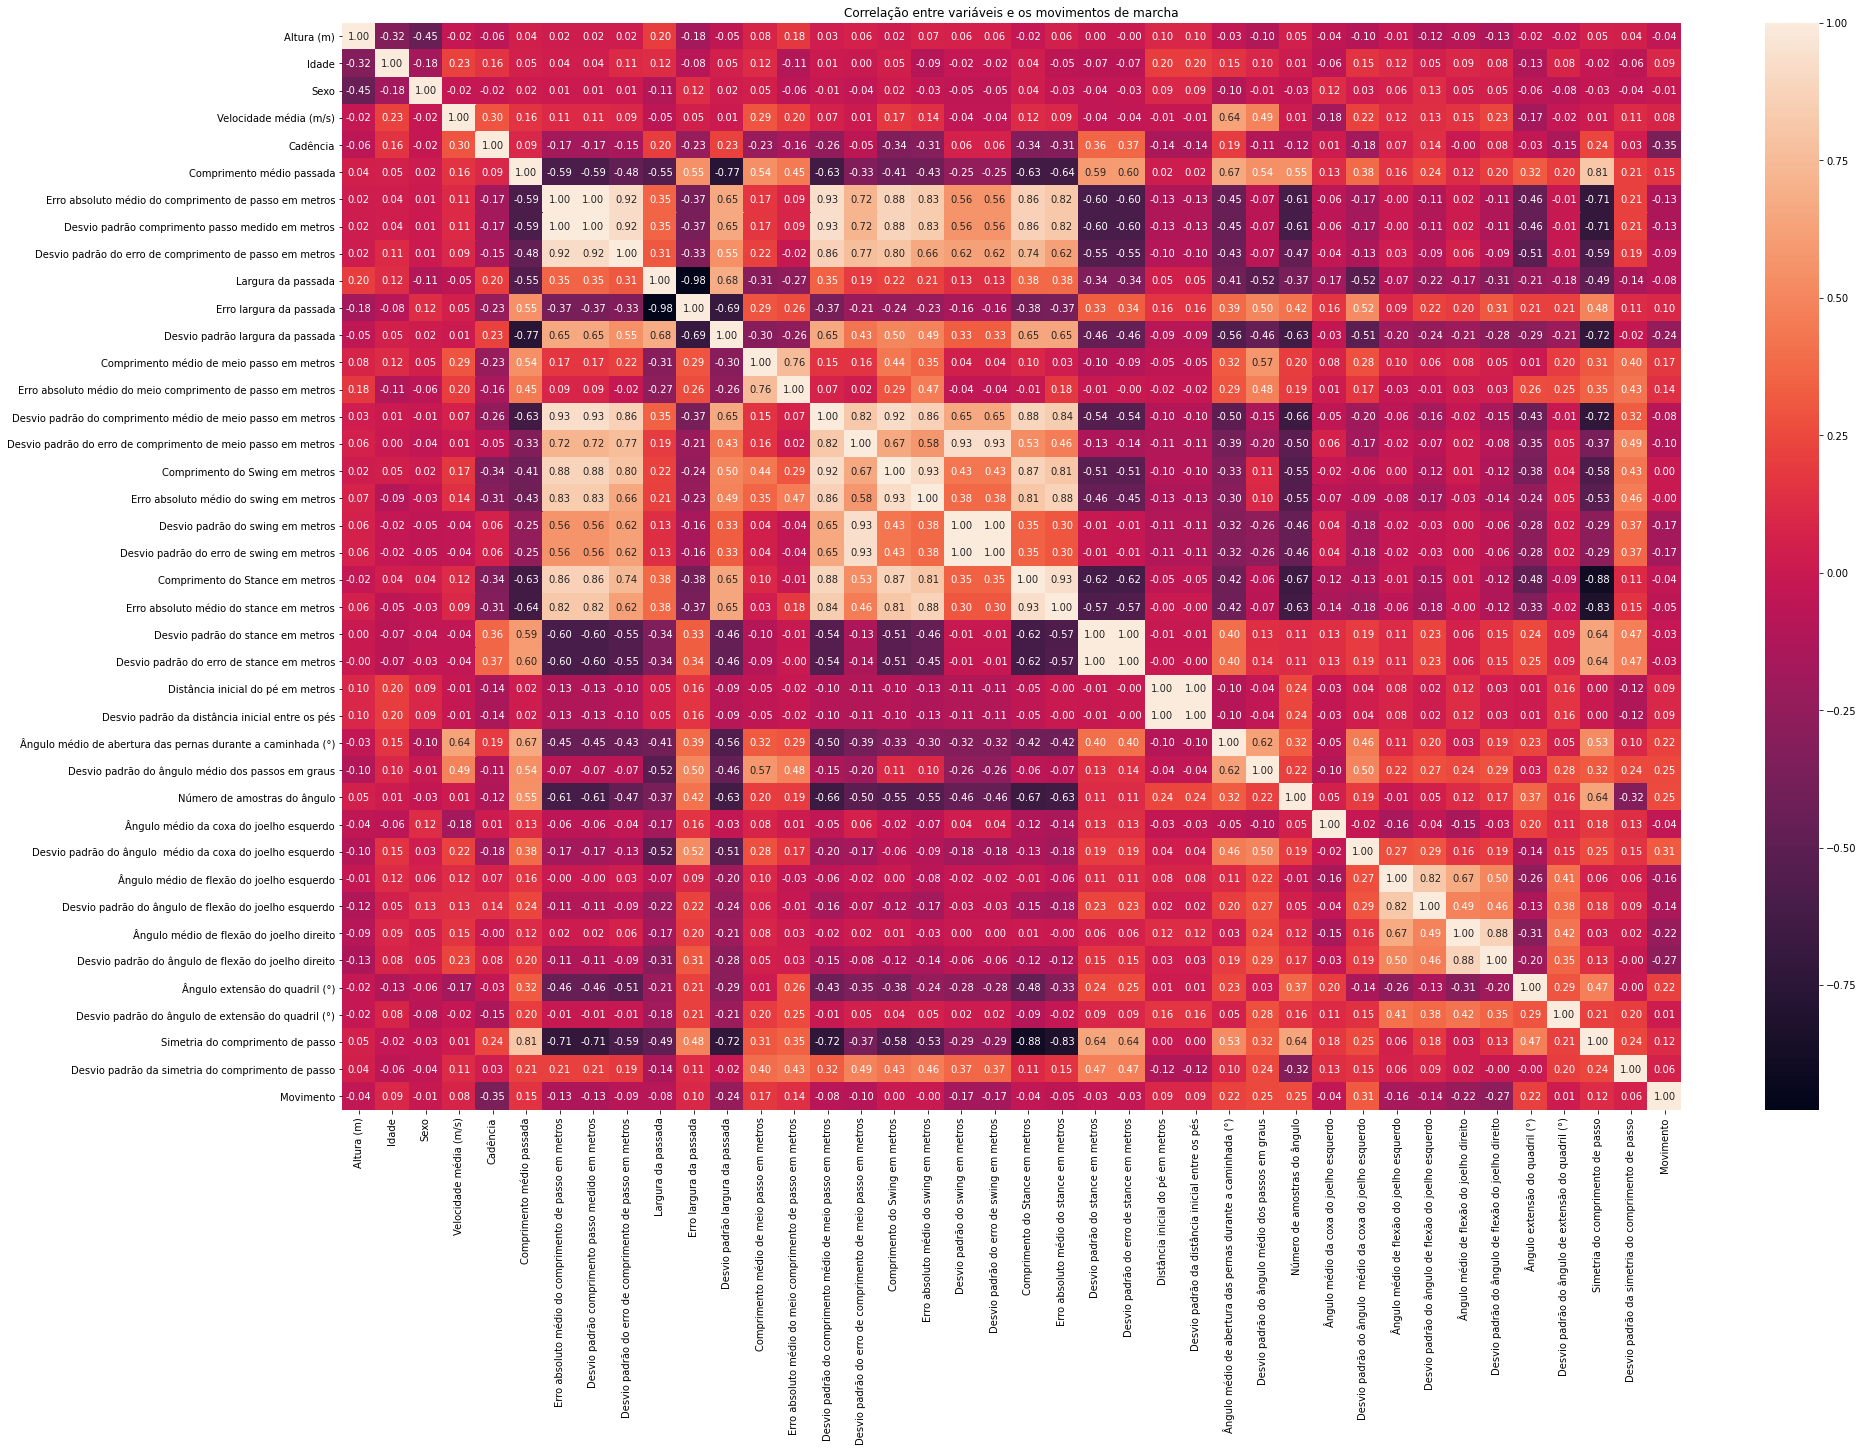

In [16]:
plt.figure(figsize=(30, 20))

sns.heatmap(data_train.corr(),
            annot = True,
            fmt = '.2f')
plt.title('Correlação entre variáveis e os movimentos de marcha')
plt.savefig('Correlação entre variáveis e os movimentos de marcha')
plt.show()

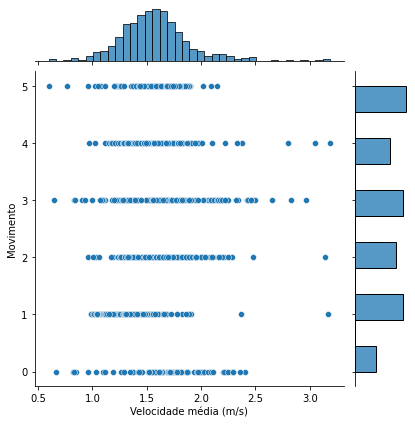

In [17]:
sns.jointplot(x='Velocidade média (m/s)', y='Movimento', data=data_train)

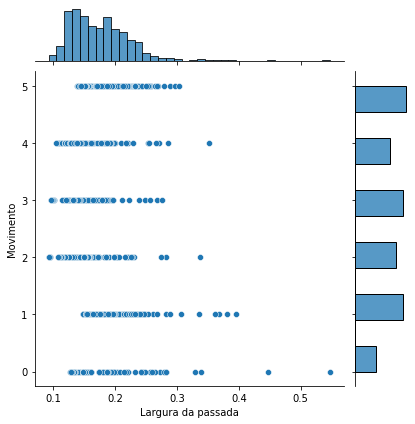

In [18]:
sns.jointplot(x='Largura da passada', y='Movimento', data=data_train)

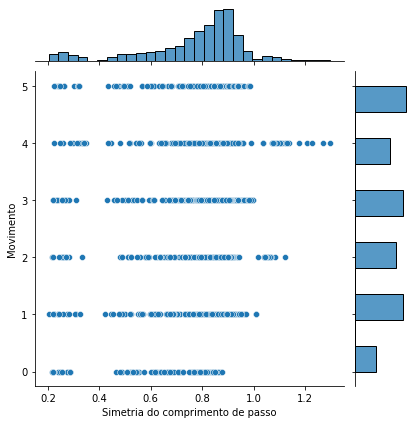

In [19]:
sns.jointplot(x='Simetria do comprimento de passo', y='Movimento', data=data_train)

In [20]:
features_selecionadas=['Altura (m)','Idade','Velocidade média (m/s)','Comprimento médio passada','Largura da passada','Comprimento médio de meio passo em metros','Ângulo médio de flexão do joelho esquerdo','Ângulo médio de flexão do joelho direito','Comprimento do Swing em metros','Comprimento do Stance em metros','Simetria do comprimento de passo','Ângulo extensão do quadril (°)','Ângulo médio de abertura das pernas durante a caminhada (°)','Cadência','Movimento']
features=features_selecionadas[:-1]

In [21]:
dataset_train=data_train[features_selecionadas]

In [22]:
dataset_train

,Altura (m),Idade,Velocidade média (m/s),Comprimento médio passada,Largura da passada,Comprimento médio de meio passo em metros,Ângulo médio de flexão do joelho esquerdo,Ângulo médio de flexão do joelho direito,Comprimento do Swing em metros,Comprimento do Stance em metros,Simetria do comprimento de passo,Ângulo extensão do quadril (°),Ângulo médio de abertura das pernas durante a caminhada (°),Cadência,Movimento
0,1.765,20.0,1.1864,0.5000,0.2422,0.4930,36.090484,35.658659,0.8263,1.0000,0.239487,-26.754673,6.7815,28.5100,0
1,1.765,20.0,1.6142,0.8432,0.1983,0.5176,34.090070,26.451588,0.7520,0.8950,0.463693,-21.745160,12.9671,55.0938,0
2,1.765,20.0,1.6873,0.9238,0.1792,0.5076,31.065103,25.991123,0.7000,0.8106,0.607896,-19.423324,14.9088,67.0830,0
3,1.765,20.0,1.5355,0.9750,0.1569,0.5286,26.123047,25.633571,0.6900,0.7697,0.712707,-7.262991,14.5685,54.7841,0
4,1.765,20.0,1.5863,0.9905,0.1501,0.5345,25.290833,23.922536,0.6705,0.7409,0.756397,-5.439119,15.3097,60.3409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1.765,20.0,1.0497,0.8982,0.1864,0.4921,11.048160,11.862961,0.6696,0.7352,0.753295,-2.920268,10.4843,29.6283,5
999,1.765,20.0,1.1192,0.9226,0.1775,0.4857,11.318548,11.864279,0.6363,0.6984,0.780018,-1.850629,11.0082,33.9087,5
1000,1.765,20.0,1.1940,0.9294,0.1711,0.4892,11.964523,11.362223,0.6153,0.6796,0.790686,-0.523739,12.0257,36.4808,5
1001,1.765,20.0,1.2668,0.9643,0.1505,0.4861,11.998292,10.747879,0.5957,0.6590,0.802964,-2.646515,13.2139,29.5747,5


In [23]:
datasheet_train=dataset_train.values

In [24]:
#dataset_test=data_test[['Altura (m)','Idade','Velocidade média (m/s)','Comprimento médio passada','Largura da passada','Comprimento médio de meio passo em metros','Ângulo médio de flexão do joelho esquerdo','Ângulo médio de flexão do joelho direito','Comprimento do Swing em metros','Comprimento do Stance em metros','Simetria do comprimento de passo','Ângulo extensão do quadril (°)','Ângulo médio de abertura das pernas durante a caminhada (°)','Cadência','Movimento']]
##dataset_test=data_test[['Altura (m)','Idade','Velocidade média (m/s)','Comprimento médio passada','Largura da passada','Comprimento médio de meio passo em metros','Ângulo médio de flexão do joelho esquerdo','Ângulo médio de flexão do joelho direito','Simetria do comprimento de passo','Ângulo extensão do quadril (°)','Ângulo médio de abertura das pernas durante a caminhada (°)','Cadência','Movimento']]
dataset_test=data_test[features_selecionadas]

In [25]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [26]:
import random
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.metrics import confusion_matrix

CATEGORIAS=["Time Up and Go","Em circulos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

##np.random.shuffle(datasheet_train)
##np.random.shuffle(datasheet_val)



In [27]:
datasheet_train

array([[ 1.765 , 20.    ,  1.1864, ...,  6.7815, 28.51  ,  0.    ],
       [ 1.765 , 20.    ,  1.6142, ..., 12.9671, 55.0938,  0.    ],
       [ 1.765 , 20.    ,  1.6873, ..., 14.9088, 67.083 ,  0.    ],
       ...,
       [ 1.765 , 20.    ,  1.194 , ..., 12.0257, 36.4808,  5.    ],
       [ 1.765 , 20.    ,  1.2668, ..., 13.2139, 29.5747,  5.    ],
       [ 1.765 , 20.    ,  1.294 , ..., 13.5603, 26.8497,  5.    ]])

In [28]:
shuffle(datasheet_train)

array([[ 1.765 , 20.    ,  1.508 , ..., 15.2941, 60.6181,  2.    ],
       [ 1.765 , 20.    ,  1.2327, ..., 14.6214, 28.6819,  4.    ],
       [ 1.765 , 40.    ,  1.7314, ..., 20.5399, 46.361 ,  5.    ],
       ...,
       [ 1.77  , 40.    ,  2.1258, ..., 19.3122, 47.4662,  3.    ],
       [ 1.765 , 20.    ,  1.6145, ..., 19.3198, 48.2816,  3.    ],
       [ 1.77  , 40.    ,  2.3402, ..., 18.3308, 44.4439,  3.    ]])

In [29]:
datasheet_test=dataset_test.values

In [30]:
datasheet_test

array([[  1.765 ,  20.    ,   4.7114, ...,   0.    ,   0.    ,   0.    ],
       [  1.765 ,  20.    ,   2.6784, ...,   0.    , 156.674 ,   0.    ],
       [  1.765 ,  20.    ,   1.9959, ...,   0.    , 115.0889,   0.    ],
       ...,
       [  1.765 ,  20.    ,   1.6272, ...,  13.0916,  34.6642,   5.    ],
       [  1.765 ,  20.    ,   1.6218, ...,  13.0576,  34.5036,   5.    ],
       [  1.765 ,  20.    ,   1.6163, ...,  13.0224,  34.3416,   5.    ]])

In [31]:
valores_linhas_train=datasheet_train[:,:-1]
valores_coluna_saida_train=datasheet_train[:,-1:]

In [32]:
valores_linhas_test=datasheet_test[:,:-1]
valores_coluna_saida_test=datasheet_test[:,-1:]

In [33]:
valores_linhas_train

array([[  1.765     ,  20.        ,   1.1864    , ..., -26.75467303,
          6.7815    ,  28.51      ],
       [  1.765     ,  20.        ,   1.6142    , ..., -21.74515951,
         12.9671    ,  55.0938    ],
       [  1.765     ,  20.        ,   1.6873    , ..., -19.42332421,
         14.9088    ,  67.083     ],
       ...,
       [  1.765     ,  20.        ,   1.194     , ...,  -0.52373948,
         12.0257    ,  36.4808    ],
       [  1.765     ,  20.        ,   1.2668    , ...,  -2.64651536,
         13.2139    ,  29.5747    ],
       [  1.765     ,  20.        ,   1.294     , ...,  -0.53513031,
         13.5603    ,  26.8497    ]])

In [34]:
valores_coluna_saida_train

array([[0.],
       [0.],
       [0.],
       ...,
       [5.],
       [5.],
       [5.]])

In [35]:
valores_linhas_test



array([[  1.765     ,  20.        ,   4.7114    , ...,   0.        ,
          0.        ,   0.        ],
       [  1.765     ,  20.        ,   2.6784    , ..., -48.21391746,
          0.        , 156.674     ],
       [  1.765     ,  20.        ,   1.9959    , ..., -52.83010109,
          0.        , 115.0889    ],
       ...,
       [  1.765     ,  20.        ,   1.6272    , ...,  -0.17775812,
         13.0916    ,  34.6642    ],
       [  1.765     ,  20.        ,   1.6218    , ...,  -0.18510734,
         13.0576    ,  34.5036    ],
       [  1.765     ,  20.        ,   1.6163    , ...,  -0.17551717,
         13.0224    ,  34.3416    ]])

In [36]:
valores_coluna_saida_test

array([[0.],
       [0.],
       [0.],
       ...,
       [5.],
       [5.],
       [5.]])

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


nr = NearMiss() #Undersampling
smt = SMOTE() #Oversampling

In [38]:
valores_linhas_train, valores_coluna_saida_train = smt.fit_sample(valores_linhas_train, valores_coluna_saida_train)

# StratifieldShufflerSplit
### Quando se usa o mesmo dataset tanto para o treino e para a validação na proporção de 70/30

In [39]:
#StratifieldShufflerSplit
sss = StratifiedShuffleSplit(n_splits=6, test_size=0.3, random_state=1)
for train_index, test_index in sss.split(valores_linhas_train,valores_coluna_saida_train):
    X_train, X_test = valores_linhas_train[train_index], valores_linhas_train[test_index]
    Y_train, Y_test = valores_coluna_saida_train[train_index], valores_coluna_saida_train[test_index]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True) # test_size é o percentual do dataset que vai ser usado nas amostras



# Para o treino com um dataset e  validação com o de 4 ciclos


In [41]:
##X_train, X_test, Y_train, Y_test =valores_linhas_train,valores_linhas_test,valores_coluna_saida_train,valores_coluna_saida_test
##X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2) # test_size é o percentual do dataset que vai ser usado nas amostras


In [42]:
import sklearn as sk
from sklearn import preprocessing
from joblib import dump

min_max_escalar=preprocessing.StandardScaler()  # MinMaxScaler()
#X_test=min_max_escalar.fit_transform(X_test)
min_max_escalar.fit_transform(X_train)
X_train=min_max_escalar.fit_transform(X_train)
X_val=min_max_escalar.fit_transform(X_val)

In [43]:
dump(min_max_escalar, 'scaler_filename.joblib')


['scaler_filename.joblib']

In [44]:
from joblib import load
scaler = load('scaler_filename.joblib')


In [45]:
##Normaliza os dados de teste com os parâmetros de normalização dos dados de treino
X_test=scaler.fit_transform(X_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
X_test.shape

(375, 14)

In [48]:
len(features)

14

In [49]:
!pip3 install sklearn 
import sklearn as sk
from sklearn import preprocessing

min_max_escalar=preprocessing.StandardScaler()  # MinMaxScaler()
X_train=min_max_escalar.fit_transform(X_train)
X_test=min_max_escalar.fit_transform(X_test)
X_val=min_max_escalar.fit_transform(X_val)


In [50]:
X_train

array([[ 1.01257216e+00,  3.36177322e-01,  8.95867190e-01, ...,
        -1.52950860e-01,  7.43912256e-01,  7.83080917e-01],
       [-3.03296787e-03, -8.60655539e-01, -5.61390223e-02, ...,
        -6.93893987e-01,  3.38957608e-01, -5.62359334e-01],
       [-3.03296787e-03, -8.60655539e-01,  7.67825430e-02, ...,
         3.32162403e-01,  8.21533536e-01, -1.38858705e+00],
       ...,
       [ 1.42053479e-01,  8.49105692e-01, -2.41911908e+00, ...,
        -2.87990934e+00, -3.16053545e+00, -2.05489639e+00],
       [-9.00848360e-02,  7.63617630e-01, -1.19450005e-01, ...,
        -7.78002163e-01,  3.31038552e-01,  2.63599127e-01],
       [-3.03296787e-03, -8.60655539e-01, -1.30314489e+00, ...,
         1.46766270e-01, -7.32412303e-01, -1.90589330e+00]])

In [51]:
X_val

array([[ 1.08886158,  0.19221956, -0.94888137, ...,  1.33177076,
        -0.08229259,  0.49715447],
       [ 1.38096398,  1.09858462, -0.1203517 , ...,  0.39731007,
         0.30993858, -0.3634682 ],
       [ 0.35860557, -0.13736774, -1.04835678, ...,  0.11313689,
        -0.58366453, -1.47808914],
       ...,
       [ 0.06650317, -0.96133598, -1.22624602, ..., -0.96432643,
        -2.73746642, -1.3656269 ],
       [-0.02112755,  0.60420368,  1.26233737, ..., -1.21427871,
         1.04169318, -0.47129743],
       [ 0.21255437,  0.6866005 , -0.81624716, ..., -2.40317094,
        -1.29853225,  1.4886373 ]])

In [52]:
X_test

array([[-2.53251148,  2.36538548,  0.19332693, ...,  0.24455775,
         0.9482063 ,  0.20595768],
       [-0.05142491, -0.90145606, -0.73523057, ...,  0.18164606,
        -0.56382068,  1.48688892],
       [ 0.24046762, -0.06380438,  0.37031717, ..., -0.40593127,
         0.12627489, -0.03998435],
       ...,
       [ 0.97019897,  0.27125629, -0.07055526, ..., -0.52082142,
        -0.21179702, -0.47488201],
       [ 1.26209151, -0.90145606,  1.02761789, ...,  0.36310993,
         1.63420321, -0.09679564],
       [ 1.26209151, -0.90145606,  0.87307206, ...,  0.41514668,
         1.4318215 , -0.29256054]])

In [53]:
#%reload_ext tensorboard

In [54]:
#!rm -rf ./logs/ 

In [55]:
#X_train=X_train.reshape([-1,1, 5])
#X_val=X_val.reshape([-1,1, 5])

In [56]:
# %load_ext tensorboard

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.optimizers import RMSprop

model = Sequential([
    Dense(1000, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.00175)),
    Dropout(0.402355),
    Dense(4000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.6),
    #Dense(4000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    #Dropout(0.3),
    Dense(4000, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    Dropout(0.6),
    Dense(1000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5),
    #Dense(4000, kernel_regularizer=regularizers.l2(0.000175),activation='relu'),
    #Dropout(0.3),
    Dense(1000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5025),
##    Dense(200, activation='relu', input_shape=(5,), kernel_regularizer=regularizers.l2(0.00175)),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.000175),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
##    Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    Dense(6, activation='softmax')
])
#model = Sequential([
#   Dense(350, activation='relu', input_shape=(5,), kernel_regularizer=regularizers.l2(0.000175)),
#    Dropout(0.35),
    #Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.000025)),
    #Dropout(0.35),
    #Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.000025)),
    #Dropout(0.3),
#    Dense(1, activation='sigmoid'),
#])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              15000     
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4000)              4004000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 4000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4000)              16004000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              4

In [59]:
import time

In [60]:
tempo_inicial=time.time()

In [61]:
model.compile(optimizer=RMSprop(),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mse','accuracy'])#,keras.metrics.Recall(),keras.metrics.Precision()])


##model.compile(optimizer='RMSprop',
##              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
##              metrics=['mse','accuracy'])#,keras.metrics.Recall(),keras.metrics.Precision()])

#NAME=("Model-of-{}",int(time.time()))
#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [62]:
class_weight = {
    0: 1.0,#4.87,
    1: 1.0,#3.639,
    2: 1.0,#5.726,
    3: 1.0,#3.7615,
    4: 1.0,#4.85946,
    5: 1.0,
}

In [63]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=0.0001, patience=10)

historico = model.fit(X_train, Y_train,class_weight=class_weight,shuffle=True,
          batch_size=16, epochs=1000,
          validation_data=(X_val, Y_val),callbacks=[es])

Train on 698 samples, validate on 175 samples
Epoch 1/1000
688/698 [============================>.] - ETA: 0s - loss: 5.5221 - mean_squared_error: 8.3935 - acc: 0.3619WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
698/698 [==============================] - 1s 1ms/sample - loss: 5.4969 - mean_squared_error: 8.4108 - acc: 0.3625 - val_loss: 3.8632 - val_mean_squared_error: 8.2879 - val_acc: 0.5829
Epoch 2/1000
698/698 [==============================] - 1s 1ms/sample - loss: 3.0965 - mean_squared_error: 8.4452 - acc: 0.5888 - val_loss: 2.2189 - val_mean_squared_error: 8.2987 - val_acc: 0.7086
Epoch 3/1000
698/698 [==============================] - 1s 1ms/sample - loss: 2.0847 - mean_squa

In [64]:
print("Tempo em segundos do processo de treino usando ", str(time.time()-tempo_inicial) + "s" )

Tempo em segundos do processo de treino usando  28.826502561569214s


In [65]:
#print("Tempo em segundos usando " + str(per_process_gpu_memory_fraction*100) +  " % da GPU: ", str(time.time()-tempo_inicial) + "s" )

In [66]:
model.evaluate(X_val,Y_val)

[0.6778850335734231, 8.34424, 0.9142857]

In [67]:
model.evaluate(X_test,Y_test)

[0.6280566941897074, 8.524558, 0.928]

In [68]:
import matplotlib.pyplot as plot

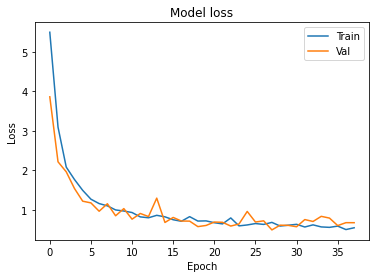

In [69]:
plot.plot(historico.history['loss'])
plot.plot(historico.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper right')
plt.savefig("Perdas_6_movimentos.png")
plot.show()

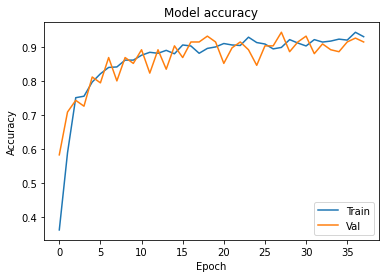

In [70]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Acuracia_6_movimentos.png")
plt.show()

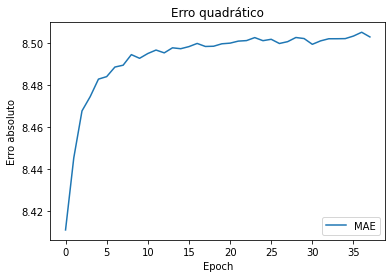

In [71]:
#Erro 
#plot.plot(historico.history['mean_absolute_error'])
plot.plot(historico.history['mean_squared_error'])
plot.title('Erro quadrático')
plot.ylabel('Erro absoluto')
plot.xlabel('Epoch')
plot.legend(['MAE'], loc='lower right')
plt.savefig("Erro_quadratico_6_movimentos.png")
plot.show()

In [72]:
model.save("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2", save_format='tf')#("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')

INFO:tensorflow:Assets written to: /tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2/assets


In [73]:
load_model = tf.keras.models.load_model("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2") #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [74]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,StratifiedKFold
#from yellowbrick.classifier import ConfusionMatrix
import numpy as np

y_pred = load_model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))
#print(y_Pred)

In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_Pred)


array([[60,  1,  0,  0,  0,  2],
       [ 0, 62,  0,  0,  0,  0],
       [ 3,  2, 56,  0,  1,  0],
       [ 3,  1,  0, 58,  0,  0],
       [ 3,  1,  0,  0, 58,  1],
       [ 4,  8,  0,  0,  0, 51]])

In [76]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(24,24)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=2)

Normalized confusion matrix


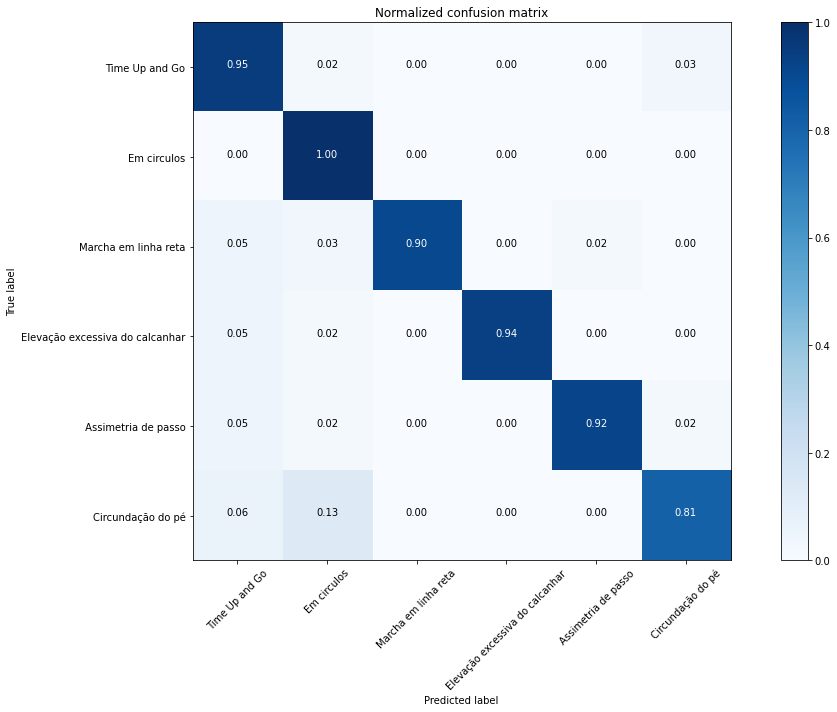

In [77]:
# Plot normalized confusion matrix

plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("Matrix Confusao Normalizada.png")
plt.show()

Confusion matrix, without normalization


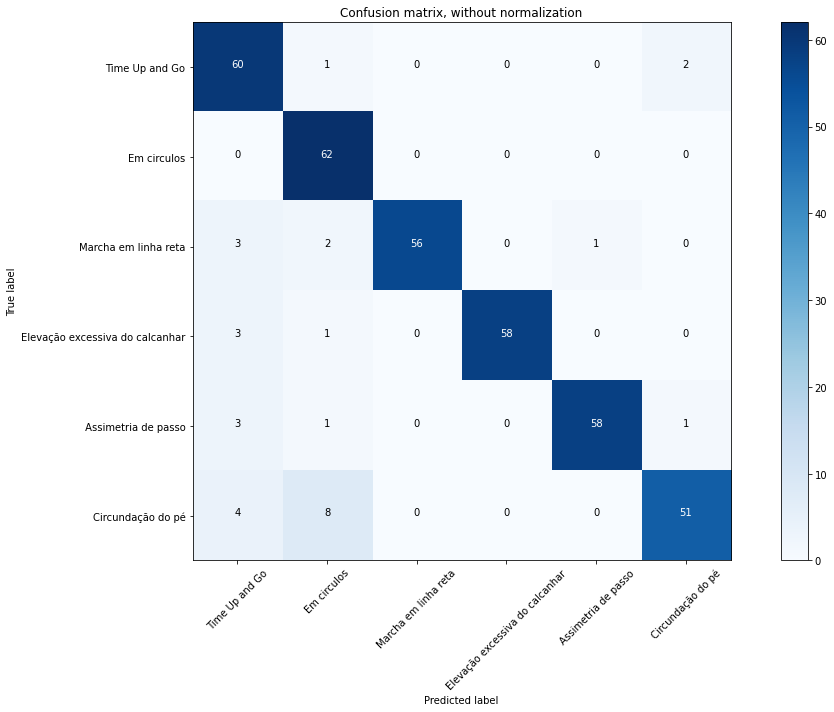

In [78]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 10))
plt.savefig("Matrix Confusao.png")
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS,title='Confusion matrix, without normalization',normalize=False)
plt.show()

In [79]:

print(classification_report(Y_test,y_Pred,digits=5, target_names=CATEGORIAS))


                                 precision    recall  f1-score   support

                 Time Up and Go    0.82192   0.95238   0.88235        63
                    Em circulos    0.82667   1.00000   0.90511        62
           Marcha em linha reta    1.00000   0.90323   0.94915        62
Elevação excessiva do calcanhar    1.00000   0.93548   0.96667        62
            Assimetria de passo    0.98305   0.92063   0.95082        63
              Circundação do pé    0.94444   0.80952   0.87179        63

                       accuracy                        0.92000       375
                      macro avg    0.92935   0.92021   0.92098       375
                   weighted avg    0.92924   0.92000   0.92083       375



In [80]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def ROC_E_AUC(y_Pred,Y_val):
    lw=2
    n_classes=6
    # Binarize the output
    Y_val= label_binarize(Y_val, classes=[0, 1, 2,3,4,5])
    n_classes = Y_val.shape[1]

    y_Pred= label_binarize(y_Pred, classes=[0, 1, 2,3,4,5])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], y_Pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), y_Pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(15, 10))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.savefig("Curva_ROC_6_movimentos_RGB_1-1_CICLO_NA_NORMALIZAÇÃO.png")
    plt.show()
    print(roc_auc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


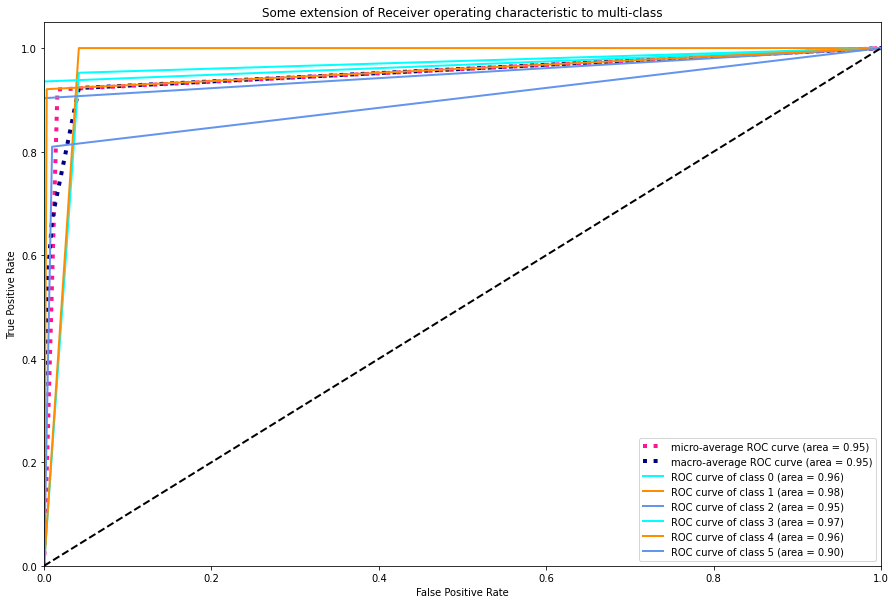

{0: 0.9553571428571429, 1: 0.9792332268370607, 2: 0.9516129032258065, 3: 0.967741935483871, 4: 0.9587148962148961, 5: 0.8999542124542125, 'micro': 0.952, 'macro': 0.9521023861788318}


In [81]:
ROC_E_AUC(y_Pred,Y_test)

In [82]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

def Average_Precision_Recall(Y_val,y_Pred):
    Y_val= label_binarize(Y_val, classes=[0, 1, 2,3,4,5])
    y_Pred= label_binarize(y_Pred, classes=[0, 1, 2,3,4,5])
    plt.figure(figsize=(15, 10))
    # precision recall curve
    precision = dict()
    recall = dict()
    average_precision = dict()
    average_precision_score=[]
    for i in range(0,6):
        precision[i], recall[i], _ = precision_recall_curve(Y_val[:, i],
                                                            y_Pred[:, i])
        #average_precision[i] = average_precision_score(Y_val[:, i], y_Pred[:, i])

        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(Y_val.ravel(),
            y_Pred.ravel())
    #average_precision["micro"] = average_precision_score(Y_val, y_Pred,
    #                                                         average="micro")
    #print('Average precision score, micro-averaged over all classes: {0:0.2f}'
    #          .format(average_precision["micro"]))
    #plt.suptitle(
    #    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    #    .format(average_precision["micro"]))
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    #plt.savefig("Curva_precision vs. recall_movimentos_FOLD_5_RGB_1_CICLO -70_30.png")
    plt.show()

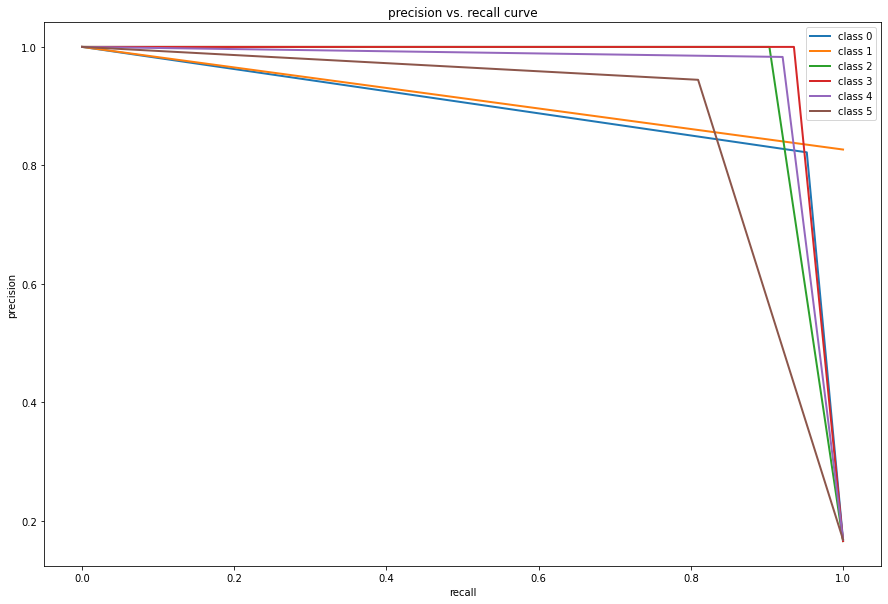

In [83]:
Average_Precision_Recall(Y_test,y_Pred)

In [84]:
##USANDO CROSS VALIDATION##

In [85]:
#model = Sequential([
#    Dense(1000, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.0001)),
#    Dropout(0.4),
#    Dense(4000, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
#    Dropout(0.6),
    #Dense(4000, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    #Dropout(0.3),
#    Dense(4000, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
#    Dropout(0.6),
#    Dense(1000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
#    Dropout(0.6),
#    Dense(1000, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
#    Dropout(0.5),
    #Dense(200, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
#    Dense(6, activation='softmax')
#    ])

In [86]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_val), axis=0)
targets = np.concatenate((Y_train, Y_val), axis=0)

Train on 698 samples, validate on 175 samples
Epoch 1/100
698/698 [==============================] - 1s 860us/sample - loss: 0.6486 - mean_absolute_error: 2.4126 - acc: 0.8854 - val_loss: 0.4917 - val_mean_absolute_error: 2.3267 - val_acc: 0.9429
Epoch 2/100
698/698 [==============================] - 0s 674us/sample - loss: 0.6965 - mean_absolute_error: 2.4126 - acc: 0.8997 - val_loss: 0.5292 - val_mean_absolute_error: 2.3267 - val_acc: 0.9257
Epoch 3/100
698/698 [==============================] - 0s 705us/sample - loss: 0.6322 - mean_absolute_error: 2.4126 - acc: 0.9011 - val_loss: 0.4842 - val_mean_absolute_error: 2.3267 - val_acc: 0.9486
Epoch 4/100
698/698 [==============================] - 0s 713us/sample - loss: 0.5767 - mean_absolute_error: 2.4126 - acc: 0.9327 - val_loss: 0.4741 - val_mean_absolute_error: 2.3267 - val_acc: 0.9657
Epoch 5/100
698/698 [==============================] - 1s 763us/sample - loss: 0.5554 - mean_absolute_error: 2.4126 - acc: 0.9327 - val_loss: 0.4320 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


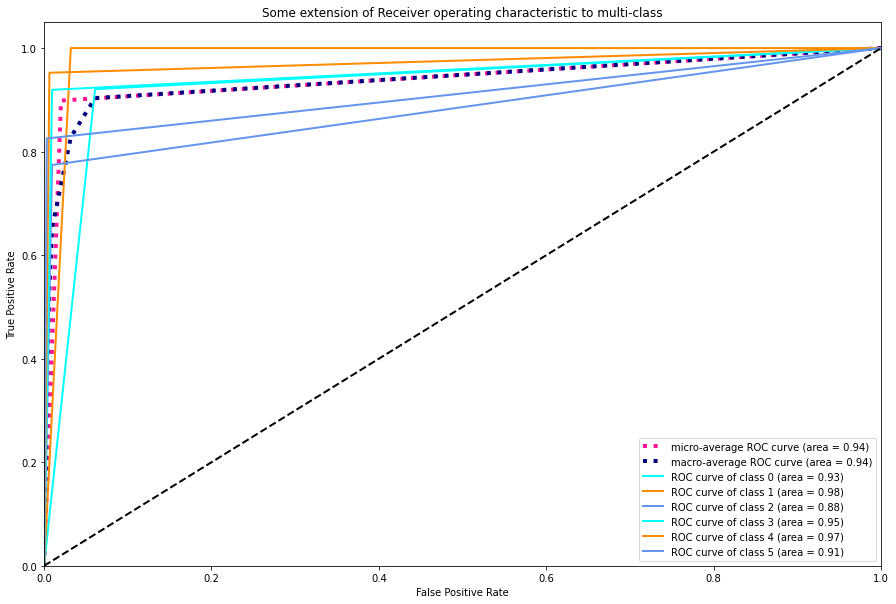

{0: 0.9298687423687423, 1: 0.9840255591054313, 2: 0.8823044419251778, 3: 0.954885087086468, 4: 0.972985347985348, 5: 0.9110958485958486, 'micro': 0.9392, 'macro': 0.939194171177836}
Train on 698 samples, validate on 175 samples
Epoch 1/100
698/698 [==============================] - 1s 1ms/sample - loss: 0.6414 - mean_absolute_error: 2.3968 - acc: 0.9140 - val_loss: 0.3961 - val_mean_absolute_error: 2.3267 - val_acc: 0.9543
Epoch 2/100
698/698 [==============================] - 1s 739us/sample - loss: 0.5653 - mean_absolute_error: 2.3968 - acc: 0.9212 - val_loss: 0.4139 - val_mean_absolute_error: 2.3267 - val_acc: 0.9657
Epoch 3/100
698/698 [==============================] - 0s 705us/sample - loss: 0.5544 - mean_absolute_error: 2.3968 - acc: 0.9312 - val_loss: 0.4995 - val_mean_absolute_error: 2.3267 - val_acc: 0.9200
Epoch 4/100
698/698 [==============================] - 1s 781us/sample - loss: 0.5555 - mean_absolute_error: 2.3968 - acc: 0.9298 - val_loss: 0.5188 - val_mean_absolute_er

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


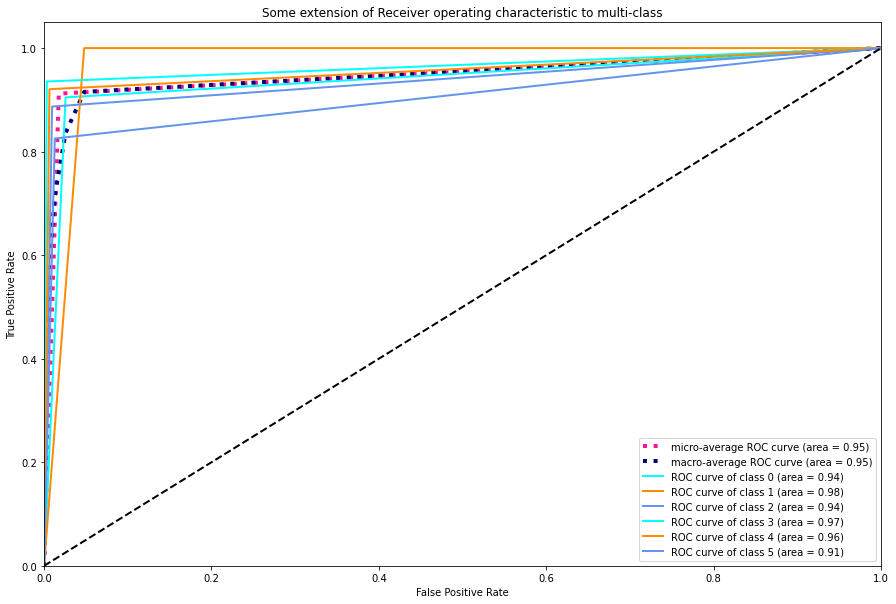

{0: 0.9395604395604394, 1: 0.976038338658147, 2: 0.9387560548284035, 3: 0.9661444913944142, 4: 0.957112332112332, 5: 0.9062881562881564, 'micro': 0.9471999999999999, 'macro': 0.9473166354736489}
Train on 698 samples, validate on 175 samples
Epoch 1/100
698/698 [==============================] - 1s 1ms/sample - loss: 0.5447 - mean_absolute_error: 2.3992 - acc: 0.9269 - val_loss: 0.3441 - val_mean_absolute_error: 2.3267 - val_acc: 0.9714
Epoch 2/100
698/698 [==============================] - 1s 762us/sample - loss: 0.5319 - mean_absolute_error: 2.3992 - acc: 0.9241 - val_loss: 0.3411 - val_mean_absolute_error: 2.3267 - val_acc: 0.9771
Epoch 3/100
698/698 [==============================] - 1s 722us/sample - loss: 0.4565 - mean_absolute_error: 2.3992 - acc: 0.9470 - val_loss: 0.3435 - val_mean_absolute_error: 2.3267 - val_acc: 0.9829
Epoch 4/100
698/698 [==============================] - 1s 749us/sample - loss: 0.5627 - mean_absolute_error: 2.3992 - acc: 0.9355 - val_loss: 0.3458 - val_mea

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


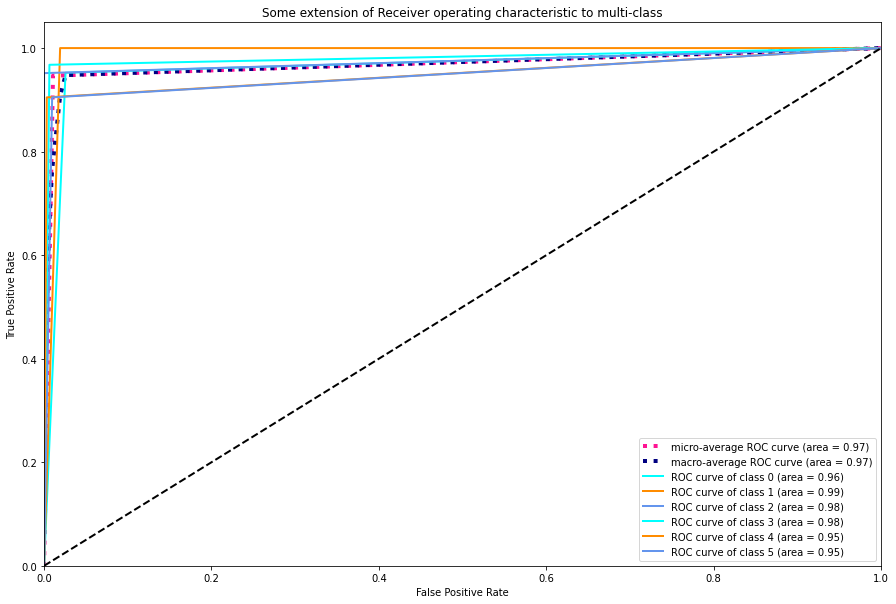

{0: 0.9633699633699633, 1: 0.9904153354632588, 2: 0.9758064516129032, 3: 0.9806760795630218, 4: 0.9507783882783882, 5: 0.94757326007326, 'micro': 0.968, 'macro': 0.9681032463934658}
Train on 699 samples, validate on 175 samples
Epoch 1/100
699/699 [==============================] - 1s 1ms/sample - loss: 0.4681 - mean_absolute_error: 2.3712 - acc: 0.9399 - val_loss: 0.3378 - val_mean_absolute_error: 2.3267 - val_acc: 0.9600
Epoch 2/100
699/699 [==============================] - 1s 782us/sample - loss: 0.4301 - mean_absolute_error: 2.3712 - acc: 0.9399 - val_loss: 0.2756 - val_mean_absolute_error: 2.3267 - val_acc: 0.9943
Epoch 3/100
699/699 [==============================] - 1s 831us/sample - loss: 0.3768 - mean_absolute_error: 2.3712 - acc: 0.9571 - val_loss: 0.2766 - val_mean_absolute_error: 2.3267 - val_acc: 0.9886
Epoch 4/100
699/699 [==============================] - 1s 797us/sample - loss: 0.4766 - mean_absolute_error: 2.3712 - acc: 0.9413 - val_loss: 0.3292 - val_mean_absolute_er

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


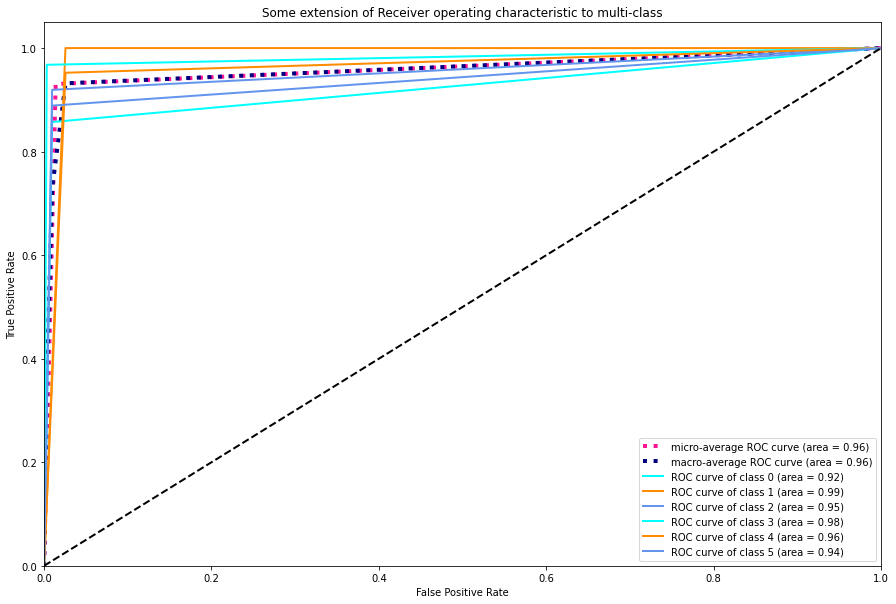

{0: 0.9237637362637363, 1: 0.9872204472843451, 2: 0.954885087086468, 3: 0.9822735236524786, 4: 0.9633699633699633, 5: 0.9396367521367521, 'micro': 0.9584, 'macro': 0.9585249182989574}
Train on 699 samples, validate on 175 samples
Epoch 1/100
699/699 [==============================] - 1s 1ms/sample - loss: 0.4376 - mean_absolute_error: 2.3550 - acc: 0.9356 - val_loss: 0.2812 - val_mean_absolute_error: 2.3267 - val_acc: 0.9714
Epoch 2/100
699/699 [==============================] - 1s 801us/sample - loss: 0.5332 - mean_absolute_error: 2.3550 - acc: 0.9213 - val_loss: 0.2597 - val_mean_absolute_error: 2.3267 - val_acc: 0.9829
Epoch 3/100
699/699 [==============================] - 1s 880us/sample - loss: 0.4189 - mean_absolute_error: 2.3550 - acc: 0.9485 - val_loss: 0.3456 - val_mean_absolute_error: 2.3267 - val_acc: 0.9486
Epoch 4/100
699/699 [==============================] - 1s 813us/sample - loss: 0.4542 - mean_absolute_error: 2.3550 - acc: 0.9413 - val_loss: 0.2978 - val_mean_absolute_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


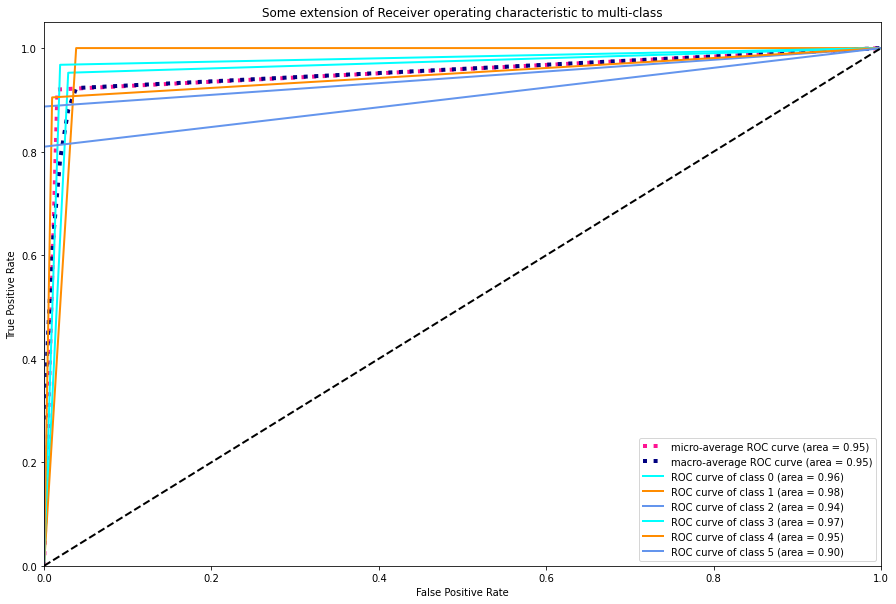

{0: 0.9617673992673992, 1: 0.9808306709265175, 2: 0.9435483870967742, 3: 0.9742863032051943, 4: 0.94757326007326, 5: 0.9047619047619048, 'micro': 0.952, 'macro': 0.9521279875551749}


In [87]:
from sklearn.model_selection import KFold
num_folds=5

kfold = KFold(n_splits=num_folds, shuffle=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=0.0001, patience=10)

fold_no = 1
for train, test in kfold.split(inputs, targets):
        
    model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mae','accuracy'])#,keras.metrics.Recall(),keras.metrics.Precision()])
    ##historico = model.fit(inputs[train], targets[train],
    ##      batch_size=64, epochs=1000,callbacks=[es])
    historico= model.fit(inputs[train], targets[train],class_weight=class_weight,shuffle=True,
          batch_size=16, epochs=100,
          validation_data=(X_val, Y_val),callbacks=[es])
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[2]} of {scores[2]*100}%')
    acc_per_fold.append(scores[2] * 100)
    loss_per_fold.append(scores[0])
    model.save("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2", save_format='tf')#("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')
    load_model = tf.keras.models.load_model("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2") #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')
    y_pred = load_model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
    y_pred=(np.around(y_pred))
#print(y_pred)
    y_Pred=[]
    for i in range(0,len(y_pred)):
        #print(np.argmax(y_pred[i]))
        y_Pred.append(np.argmax(y_pred[i]))
    print(classification_report(Y_test,y_Pred,digits=5))
    ROC_E_AUC(y_Pred,Y_test)
    fold_no = fold_no + 1


In [88]:
y_pred = load_model.predict(X_val)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))


In [89]:

print(classification_report(Y_val,y_Pred,digits=5, target_names=CATEGORIAS))


                                 precision    recall  f1-score   support

                 Time Up and Go    0.89189   0.97059   0.92958        34
                    Em circulos    0.93548   1.00000   0.96667        29
           Marcha em linha reta    1.00000   0.93103   0.96429        29
Elevação excessiva do calcanhar    0.96000   1.00000   0.97959        24
            Assimetria de passo    1.00000   1.00000   1.00000        29
              Circundação do pé    1.00000   0.86667   0.92857        30

                       accuracy                        0.96000       175
                      macro avg    0.96456   0.96138   0.96145       175
                   weighted avg    0.96282   0.96000   0.95983       175



In [90]:
#X_normalizado.shape

In [91]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.636107349055154 - Accuracy: 94.28571462631226%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.6620052824701582 - Accuracy: 94.85714435577393%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.43724993075643265 - Accuracy: 97.7142870426178%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.6075099898480821 - Accuracy: 91.37930870056152%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.5664103702567089 - Accuracy: 91.95402264595032%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 94.03809547424316 (+- 2.2653497488789642)
> Loss: 0.5818565844773073
-----------------------------

In [92]:
model.save("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2", save_format='tf')#("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')

INFO:tensorflow:Assets written to: /tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2/assets


In [93]:
load_model = tf.keras.models.load_model("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2") #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')


In [94]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = load_model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))
#print(y_Pred)

Normalized confusion matrix


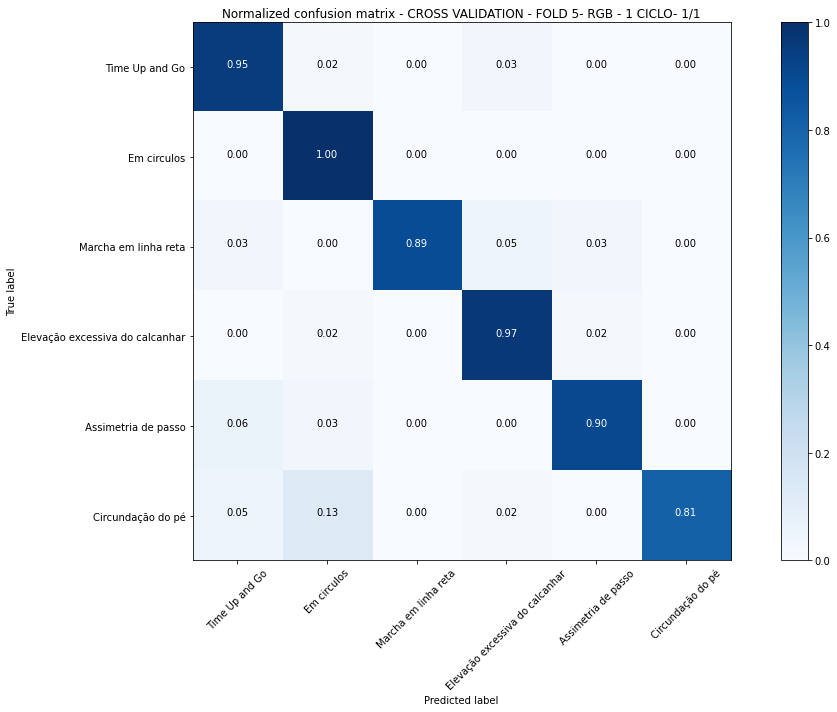

In [95]:
# Plot normalized confusion matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix - CROSS VALIDATION - FOLD 5- RGB - 1 CICLO- 1/1')
plt.savefig("Matrix Confusao Normalizada CROSS VALIDATION - FOLD 5'.png")
plt.show()

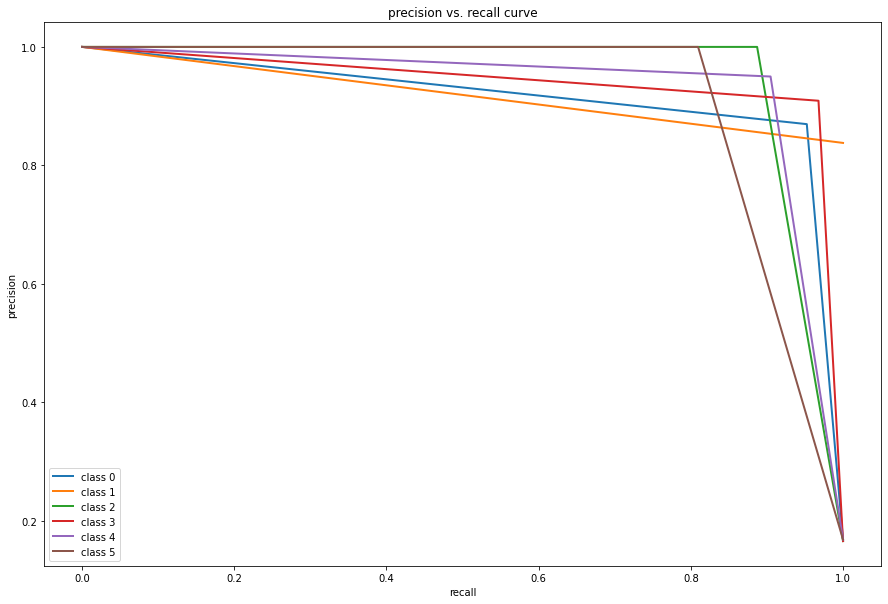

In [96]:
Average_Precision_Recall(Y_test,y_Pred)

In [97]:
#importing standard neural network libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score # for evaluation
from sklearn.metrics import confusion_matrix,classification_report

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, random_state=50),
    SVC(kernel = 'poly', C = 2)    
]

names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, Y_train)
    ypred = clf.predict(X_val)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(ypred, Y_val))

names.append('Neural Nwtwork')

y_pred = load_model.predict(X_val)  #cross_val_predict(model, X_train, Y_train, cv = cv)
y_pred=(np.around(y_pred))

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))
#print(y_Pred)
scores.append(accuracy_score(y_Pred, Y_val))

score_df = pd.DataFrame({'Model': names,'Score': scores})
score_df

,Model,Score
0,DecisionTreeClassifier,0.720000
1,RandomForestClassifier,0.828571
2,SVC,0.794286
3,Neural Nwtwork,0.960000


In [98]:
score_df.to_csv("score_df.csv")

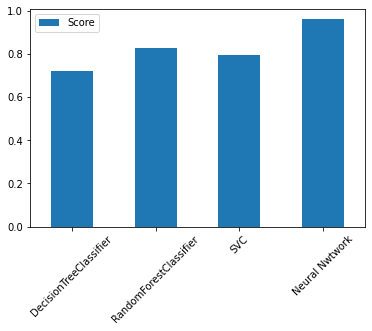

In [99]:

ax = score_df.plot.bar()
ax.set_xticklabels(score_df['Model'], rotation=45, fontsize=10)
plt.savefig('comparacao_entre_os_modelos_scores.png')

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
#model = RandomForestClassifier(n_estimators=10,max_depth=6, max_features='auto', max_leaf_nodes=None,random_state=100)
model = RandomForestClassifier(max_depth=5, random_state=100,n_estimators=1000)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=100)

In [101]:
estimatorAccuracy=[]
n_estimators=100

for curEstimator in range(n_estimators):
    estimatorAccuracy.append([curEstimator,accuracy_score(Y_val, model.estimators_[curEstimator].predict(X_val))])

estimatorAccuracy=pd.DataFrame(estimatorAccuracy,columns=['estimatorNumber','Accuracy'])
estimatorAccuracy.sort_values(inplace=True,by='Accuracy',ascending=False)

bestDecisionTree= model.estimators_[estimatorAccuracy.head(1)['estimatorNumber'].values[0]]


In [102]:
bestDecisionTree

DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=191920083)

In [103]:
score = model.estimators_[0].score(X_val, Y_val)
print(score)

0.5371428571428571


In [104]:
score = model.estimators_[0].score(X_test, Y_test)
print(score)

0.592


In [105]:
score = bestDecisionTree.score(X_val, Y_val)
print(score)

0.6914285714285714


In [106]:
score = bestDecisionTree.score(X_test, Y_test)
print(score)

0.704


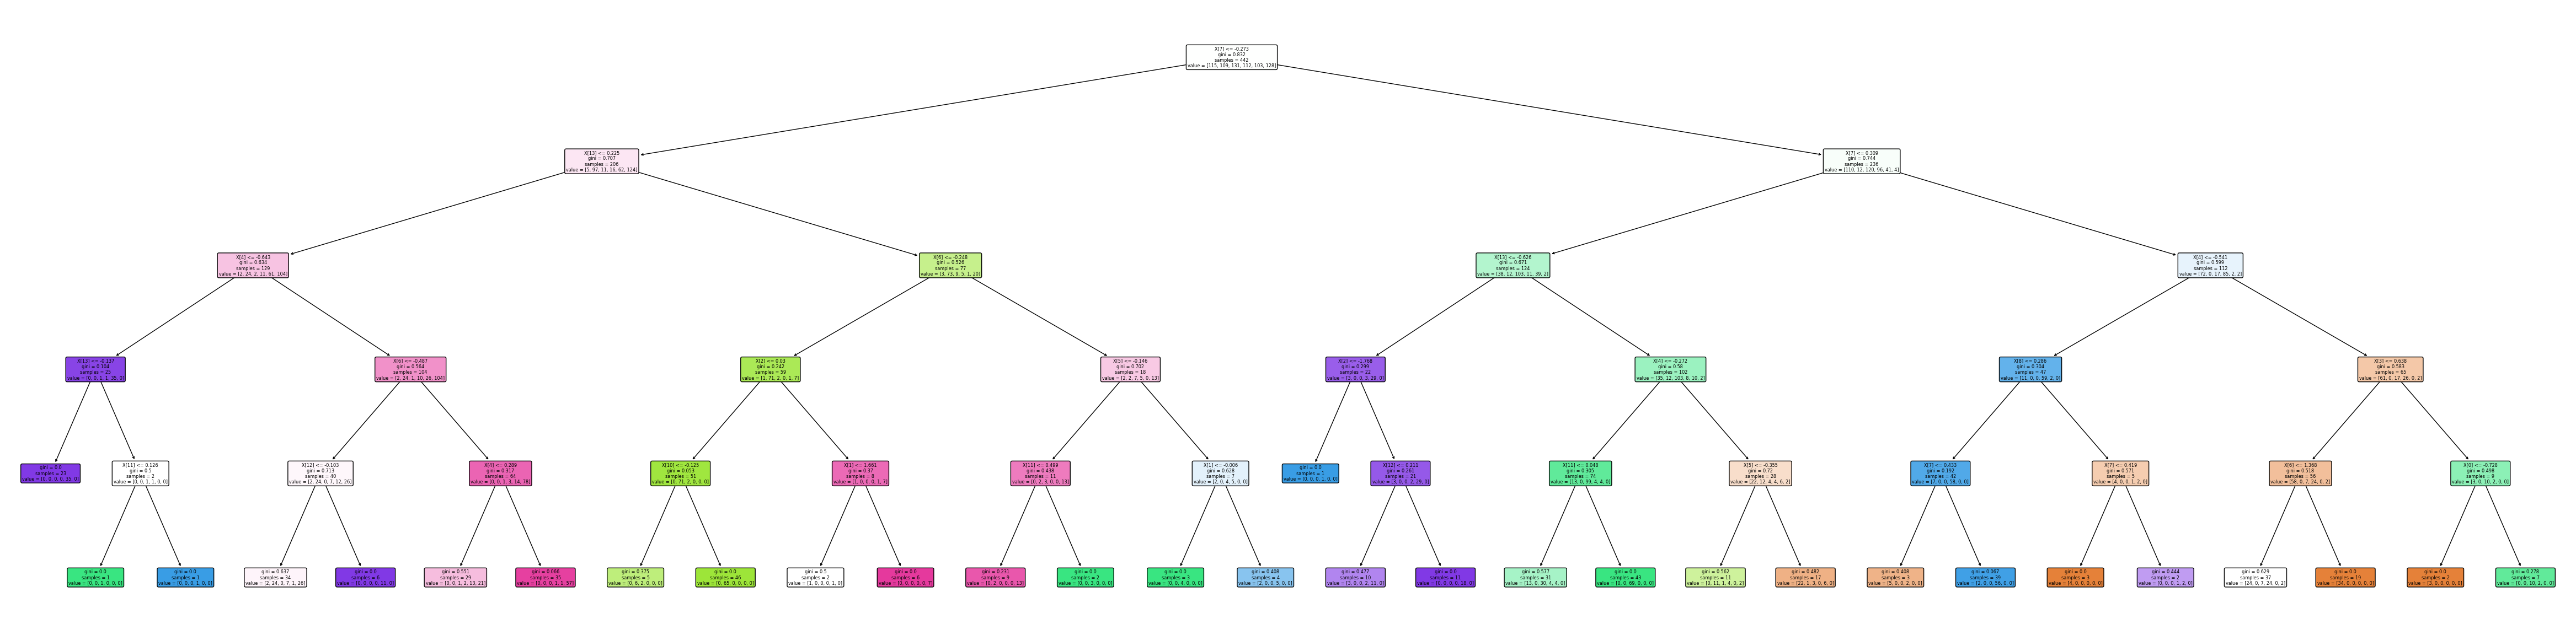

In [107]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (60,15), dpi = 100)
tree.plot_tree(bestDecisionTree,filled=True, rounded=True) 
fig.savefig('randomforest.png')

In [108]:
model=SVC(kernel = 'poly', C = 2)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))

    
print(classification_report(Y_test,y_Pred,digits=5, target_names=CATEGORIAS))

                                 precision    recall  f1-score   support

                 Time Up and Go    0.16800   1.00000   0.28767        63
                    Em circulos    0.00000   0.00000   0.00000        62
           Marcha em linha reta    0.00000   0.00000   0.00000        62
Elevação excessiva do calcanhar    0.00000   0.00000   0.00000        62
            Assimetria de passo    0.00000   0.00000   0.00000        63
              Circundação do pé    0.00000   0.00000   0.00000        63

                       accuracy                        0.16800       375
                      macro avg    0.02800   0.16667   0.04795       375
                   weighted avg    0.02822   0.16800   0.04833       375



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
##TERMINEI DE USAR O CROSS VALIDATION##

In [110]:
data_validation=pd.read_csv('Parâmetros_de_todos_para_validacao.csv') #('/tf/tensorflow-tutorials/Modelo_1/Parâmetros_de_todos_para_validacao.csv')


In [111]:
data_validation

,Altura (m),Idade,Sexo,Velocidade média (m/s),Cadência,Comprimento médio passada,Erro absoluto médio do comprimento de passo em metros,Desvio padrão comprimento passo medido em metros,Desvio padrão do erro de comprimento de passo em metros,Largura da passada,...,Desvio padrão do ângulo médio da coxa do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo,Desvio padrão do ângulo de flexão do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo.1,Desvio padrão do ângulo de flexão do joelho esquerdo.1,Ângulo extensão do quadril (°),Desvio padrão do ângulo de extensão do quadril (°),Simetria do comprimento de passo,Desvio padrão da simetria do comprimento de passo,Movimento
0,1.8,22.0,0,2.4771,85.8114,0.8814,0.0814,0.2463,0.07,0.1860,...,63.673795,61.693840,2.613028,61.690105,3.119239,-4.002852,1.733533,0.972743,0.106210,0
1,1.8,22.0,0,2.5769,89.2423,0.9061,0.1061,0.2671,0.11,0.1861,...,63.253689,61.736346,3.042173,61.975232,3.899347,-3.881163,1.479701,1.085146,0.200919,0
2,1.8,22.0,0,2.6541,86.1764,0.9491,0.1491,0.3012,0.10,0.1962,...,59.499057,61.937911,1.581422,60.901554,5.842651,-3.751775,0.506643,0.977227,0.219753,0
3,1.8,22.0,0,2.5441,85.9300,0.9463,0.1463,0.2617,0.13,0.1781,...,65.269423,61.934617,3.343345,62.321509,3.386579,-2.811931,1.125254,1.082421,0.406247,0
4,1.8,22.0,0,2.4322,98.2647,0.9189,0.1189,0.3031,0.07,0.1736,...,60.205562,59.058891,5.442693,61.020977,6.290838,-2.878588,1.073991,0.971814,0.206311,0
5,1.8,22.0,0,2.4834,81.9007,0.9940,0.1940,0.2050,0.15,0.1691,...,67.004030,59.624753,6.736223,60.523253,5.750733,-2.300516,1.037823,0.973417,0.514254,0
6,1.8,22.0,0,2.6105,96.1523,0.8999,0.0999,0.2878,0.12,0.1854,...,64.341093,62.082713,3.069286,63.230412,3.736002,-1.151960,1.098725,1.084448,0.391825,0
7,1.8,22.0,0,2.4497,88.9866,0.8634,0.0634,0.2904,0.11,0.1648,...,57.431759,61.655226,1.237801,61.800631,1.625464,-3.332839,0.552155,1.000249,0.067091,0
8,1.8,22.0,0,2.7436,71.0517,1.0446,0.2446,0.1432,0.14,0.2024,...,62.859746,60.539179,1.519639,60.372408,1.005581,-4.040164,0.680107,1.127755,0.323693,0
9,1.8,22.0,0,3.1189,76.4596,1.0251,0.2251,0.3308,0.19,0.2383,...,62.350125,59.445123,4.308981,59.491695,5.649206,-1.924048,1.299007,0.897770,0.352336,0


In [112]:
dataset_validation=data_validation[['Velocidade média (m/s)','Comprimento médio passada','Largura da passada','Simetria do comprimento de passo','Cadência','Movimento']]

In [113]:
dataset_validation

,Velocidade média (m/s),Comprimento médio passada,Largura da passada,Simetria do comprimento de passo,Cadência,Movimento
0,2.4771,0.8814,0.1860,0.972743,85.8114,0
1,2.5769,0.9061,0.1861,1.085146,89.2423,0
2,2.6541,0.9491,0.1962,0.977227,86.1764,0
3,2.5441,0.9463,0.1781,1.082421,85.9300,0
4,2.4322,0.9189,0.1736,0.971814,98.2647,0
5,2.4834,0.9940,0.1691,0.973417,81.9007,0
6,2.6105,0.8999,0.1854,1.084448,96.1523,0
7,2.4497,0.8634,0.1648,1.000249,88.9866,0
8,2.7436,1.0446,0.2024,1.127755,71.0517,0
9,3.1189,1.0251,0.2383,0.897770,76.4596,0


In [114]:
datasheet_validation=dataset_validation.values

In [115]:
valores_linhas_validation=datasheet_validation[:,0:5]

In [116]:
X_normalizado_validacao=min_max_escalar.fit_transform(valores_linhas_validation)

In [117]:
X_normalizado_validacao

array([[-1.06, -1.4 , -0.68, -0.45,  0.46],
       [-0.59, -0.94, -0.68,  1.11,  0.84],
       [-0.22, -0.12, -0.35, -0.39,  0.5 ],
       [-0.74, -0.18, -0.94,  1.08,  0.47],
       [-1.28, -0.69, -1.08, -0.47,  1.85],
       [-1.03,  0.73, -1.23, -0.45,  0.02],
       [-0.43, -1.05, -0.7 ,  1.1 ,  1.61],
       [-1.2 , -1.75, -1.37, -0.07,  0.81],
       [ 0.21,  1.68, -0.14,  1.71, -1.18],
       [ 2.01,  1.32,  1.03, -1.5 , -0.58],
       [ 0.67,  0.06,  1.23, -0.49,  0.04],
       [ 1.31, -0.07,  1.29, -0.37, -0.92],
       [ 0.84, -0.07,  1.29, -0.37, -1.19],
       [-0.49,  1.68, -0.14,  1.71, -1.61],
       [ 1.45,  0.72,  1.13, -1.66, -1.17],
       [ 0.56,  0.08,  1.34, -0.48,  0.04]])

In [118]:
import numpy as np

In [119]:
CATEGORIAS=["Time Up and Go","Em círculos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

for line in range(0,len(X_normalizado_validacao)):
    #print(X_normalizado_validacao[line])
    teste = X_normalizado_validacao[line].reshape([1,5])
    print(teste)
    prediction=load_model.predict(teste)
    print(prediction)
    prediction=(np.around(prediction).reshape([1,6]))
    print(prediction)
    print(CATEGORIAS[(np.argmax(prediction))])

[[-1.06 -1.4  -0.68 -0.45  0.46]]


ValueError: Error when checking input: expected dense_input to have shape (14,) but got array with shape (5,)

In [ ]:
teste = [1.05364409,  0.88002339, 0.20362799,  0.80318584, 19.08771569] #X_normalizado_validacao[line].reshape([1,5])
teste=np.array(teste)
print(teste)
